In [3]:
# regression mlp model for the abalone dataset
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA as RandomizedPCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:
train_data = pd.read_csv('ave.csv')

In [6]:
pca = RandomizedPCA(150)
pca.fit(train_data)

PCA(n_components=150)

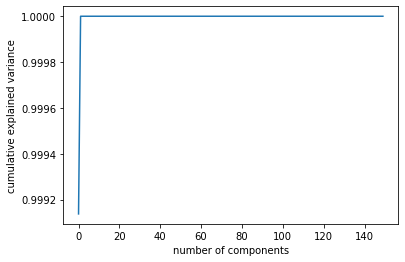

In [7]:
import numpy as np 
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
X = train_data.drop(['carid', 'price'], axis=1)
y = train_data['carid']
n_components = 150
pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X)
X_pca = pca.transform(X)

In [32]:
n_features = X.shape[1]
model = Sequential()
model.add(Dense(20, input_dim=n_features, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='linear'))

In [33]:
model.compile(loss='mse', optimizer='adam')
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=2)
# evaluate on test set
yhat = model.predict(X_test)
error = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % error)

Epoch 1/150
629/629 - 1s - loss: 1572890752.0000
Epoch 2/150
629/629 - 1s - loss: 554061056.0000
Epoch 3/150
629/629 - 1s - loss: 456282688.0000
Epoch 4/150
629/629 - 1s - loss: 455033664.0000
Epoch 5/150
629/629 - 1s - loss: 453810400.0000
Epoch 6/150
629/629 - 1s - loss: 452575104.0000
Epoch 7/150
629/629 - 1s - loss: 451370240.0000
Epoch 8/150
629/629 - 1s - loss: 450359072.0000
Epoch 9/150
629/629 - 1s - loss: 449266880.0000
Epoch 10/150
629/629 - 1s - loss: 448186432.0000
Epoch 11/150
629/629 - 1s - loss: 447152096.0000
Epoch 12/150
629/629 - 1s - loss: 446157984.0000
Epoch 13/150
629/629 - 1s - loss: 445067296.0000
Epoch 14/150
629/629 - 1s - loss: 444076256.0000
Epoch 15/150
629/629 - 1s - loss: 443002176.0000
Epoch 16/150
629/629 - 1s - loss: 441971712.0000
Epoch 17/150
629/629 - 1s - loss: 440825888.0000
Epoch 18/150
629/629 - 1s - loss: 439649696.0000
Epoch 19/150
629/629 - 1s - loss: 438511104.0000
Epoch 20/150
629/629 - 1s - loss: 437191040.0000
Epoch 21/150
629/629 - 1s - 

In [30]:
from keras import models
from keras import layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(331, activation='relu', input_shape=(X.shape[1],)))
    model.add(layers.Dense(1000, activation='relu'))
    model.add(layers.Dense(1))  # 线性
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [31]:
# k折验证
k = 4
num_val_samples = len(X_pca) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data =X_pca[i * num_val_samples: (i + 1) * num_val_samples]  # 准备验证数据：第k个分区的数据
    val_targets = y[i * num_val_samples:(i + 1) * num_val_samples]
    # 准备训练数据：其他所有分区的数据
    partial_train_data = np.concatenate(
        [X_pca[:i * num_val_samples],
        X_pca[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [y[:i * num_val_samples],
         y[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1,
              verbose=0)  # 训练模型（静默模式，vervose=0）
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)  # 在验证数据上评估模型
    all_scores.append(val_mae)

processing fold # 0


ValueError: Error when checking input: expected dense_13_input to have shape (331,) but got array with shape (150,)

In [ ]:
num_epochs = 500 
all_mae_histories = [] 
for i in range(k):
     print('processing fold #', i)
     val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples] 
     val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
     partial_train_data = np.concatenate( [train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]], axis=0)
     partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],train_targets[(i + 1) * num_val_samples:]],axis=0)
     model = build_model() 
     history = model.fit(partial_train_data, partial_train_targets, 
     validation_data=(val_data, val_targets),epochs=num_epochs, batch_size=1, verbose=0)
     mae_history = history.history['val_mean_absolute_error']
     all_mae_histories.append(mae_history)